In [14]:
# importing libraries
import os
import glob
import random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from PIL import Image
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [7]:
# uploading the training and test dataset to the kerneL
train_csv = pd.read_csv("Training_set[1].csv")
test_csv = pd.read_csv("Testing_set[1].csv")

In [9]:
# uploading the path for the test and train folders
train_fol = glob.glob(r"C:\Users\vijis\Downloads\archive (1).zip\Human Action Recognition\train") 
test_fol = glob.glob(r"C:\Users\vijis\Downloads\archive (1).zip\Human Action Recognition\test")

In [10]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [11]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [41]:
# visualizing the human activity dataset
l = train_csv.label.value_counts()
fig = px.pie(train_csv, values=l.values, names=l.index, title='Human Activity Distribution')
fig.show()

In [19]:
X_train = train_csv['filename']
y_train = train_csv['label']

In [20]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + X_train[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(y_train[i])

In [21]:
inp_shape = (160, 160,3)

In [22]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [24]:
Y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

sitting


In [25]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))



58889256/58889256 [==============================] - 17s 0us/step


In [29]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

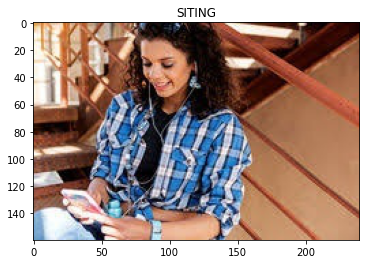

In [38]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("SITING")
image = mpimg.imread(r"C:\Users\vijis\AppData\Local\Temp\3649cf31-e410-4573-9b35-f519410f8002_archive (1).zip.002\Human Action Recognition\train\Image_1.jpg")
plt.imshow(image)
plt.show()